 #  6장 지도학습: 분류


    X ; 입력변수 T : target variable 목표변수    
        
    N마리 곤충 각각의 무게: Xn, 각각의 성별 : Tn 0이면 암컷, 1이면 수컷

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(0)
X_min =0
X_max=2.5
X_n = 30
X_col = ['cornflowerblue','gray']
X= np.zeros(X_n)#입력 데이터
T=np.zeros(X_n,dtype=np.uint8) #목표데이터
Dist_s=[0.4,0.8]#분포의 시작지점
Dist_w=[0.8,1.6]#분포의 폭
Pi=0.5#클래스 0 의 비율 => 암컷이 될 확률
for n in range(X_n):
    wk = np.random.rand()
    T[n] = 0*(wk<Pi)+1*(wk>=Pi)
    X[n]=np.random.rand()*Dist_w[T[n]]+Dist_s[T[n]]
print('X='+str(np.round(X,2)))
print('T='+str(T))

X=[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T=[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


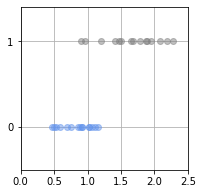

In [2]:
def show_data1(x,t):
    K = np.max(t)+1
    for k in range(K):
        plt.plot(x[t==k],t[t==k],X_col[k],alpha=0.5,linestyle='none',marker='o')
        plt.grid(True)
        plt.ylim(-.5,1.4)
        plt.xlim(X_min,X_max)
        plt.yticks([0,1])
fig = plt.figure(figsize=(3,3))
show_data1(X,T)
plt.show()

#### 최대 가능 도법:
주어진 입력 데이터 x에 대해 라벨 데이터 t가 생성될 확률이 가장 커지는 w를 추청치로 한다

###  로지스틱 회귀 모델

    - 직선 모델 y = W0X + W₁=> 직선 모델이 시그모이드 함수를 통과.
    - 로지스틱 회귀 모델 : y = σ(W0X+W₁).
    - 시그모이드 함수 : σ(x) = 1/(1+ exp(-x))
    - 시그모이드 함수를 통과한 직선은 0과 1 사이에 들어간다.
    - 직선이 0의 값을 갖는 점은 그 중간인 0.5의 값이 된다

In [6]:
def logistic(x,w):
    y = 1/(1+np.exp(-(w[0]*x+w[1])))
    return y

In [7]:
def show_logistic(w):
    xb = np.linspace(X_min,X_max,100)
    y = logistic(xb,w)
    plt.plot(xb,y,color='gray',linewidth=4)
    #결정 경계
    i=np.min(np.where(y>0.5))
    B = (xb[i-1]+xb[i])/2
    plt.plot([B,B],[-.5,1.5],color='k',linestyle='--')
    plt.grid(True)
    return B

1.25

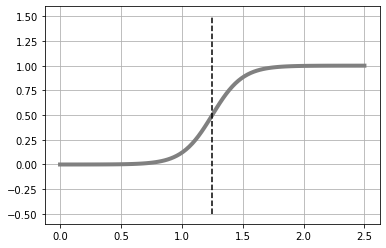

In [8]:
W=[8,-10]
show_logistic(W)

###  교차 엔트로피 오차

평균 교차 엔트로피 오차 Ε(x) = -1/N log P(T|X) = -1/N Σ{tｎlog yｎ + (1-tｎ)log(1-yｎ)}  

In [10]:
def cee_logistic(w,x,t):
    y = logistic(x,w)
    cee = 0
    for n in range(len(y)):
        cee = cee - (t[n]*np.log(y[n]) + (1-t[n])*np.log(1-y[n]))
    cee = cee/X_n
    return cee
    
W=[1,1]
cee_logistic(W,X,T)

1.0288191541851066

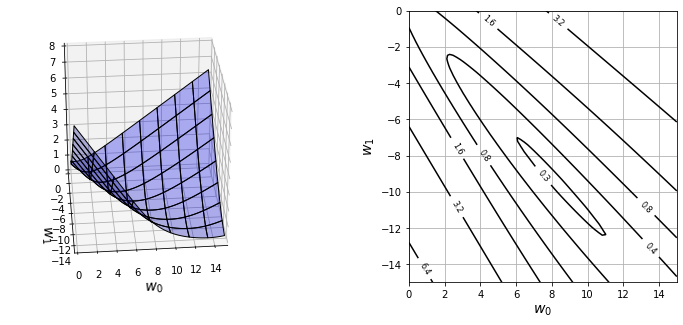

In [12]:
from mpl_toolkits.mplot3d import Axes3D

xn = 80#등고선 해상도
w_range= np.array([[0,15],[-15,0]])
x0 = np.linspace(w_range[0,0],w_range[0,1],xn)
x1 = np.linspace(w_range[1,0],w_range[1,1],xn)
xx0,xx1 = np.meshgrid(x0,x1)
C = np.zeros((len(x1),len(x0)))
w = np.zeros(2)
for i0 in range(xn):
    for i1 in range(xn):
        w[0]=x0[i0]
        w[1]=x1[i1]
        C[i1,i0]=cee_logistic(w,X,T)
        
plt.figure(figsize = (12,5))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1,2,1,projection = '3d')
ax.plot_surface(xx0,xx1,C,color='blue',edgecolor='black',rstride=10,cstride=10,alpha=0.3)
ax.set_xlabel('$w_0$',fontsize=14)
ax.set_ylabel('$w_1$',fontsize=14)
ax.set_xlim(0,15)
ax.set_ylim(-15,0)
ax.set_zlim(0,8)
ax.view_init(30,-95)

plt.subplot(1,2,2)
cont = plt.contour(xx0,xx1,C,20,colors='black',levels = [0.26,0.4,0.8,1.6,3.2,6.4])
cont.clabel(fmt='%1.1f',fontsize=8)
plt.xlabel('$w_0$',fontsize=14)
plt.ylabel('$w_1$',fontsize=14)
plt.grid(True)
plt.show()

In [20]:
#평균 교차 엔트로피 오차의 미분
def dcee_logistic(w,x,t):
    y = logistic(x,t)
    dcee = np.zeros(2)
    for n in range(len(y)):
        dcee[0]=dcee[0]+(y[n]-t[n])*x[n]
        dcee[1]=dcee[1]+(y[n]-t[n])
    dcee =dcee/X_n
    return dcee
W=[1,1]
dcee_logistic(W,X,T)

array([0.30857905, 0.39485474])

경사하강법에 의한 해

In [60]:
from scipy.optimize import minimize
#매개 변수 검색
def fit_logistic(w_init,x,t):#문제 있음!! 안돼ㅠㅠ
    res1 = minimize(cee_logistic,w_init,args=(x,t),
                    jac=dcee_logistic,method="CG")
    print(res1)
    return res1.x


     fun: 0.3121764670652982
     jac: array([0.30857905, 0.39485474])
 message: 'Desired error not necessarily achieved due to precision loss.'
    nfev: 40
     nit: 0
    njev: 28
  status: 2
 success: False
       x: array([ 8., -8.])
w0=8.00, w1=-8.00
CEE = 0.31
Boundary = 1.00 g


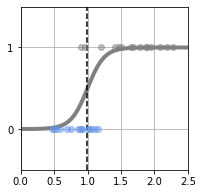

In [59]:
plt.figure(1,figsize=(3,3))
W_init=[8,-8]
W = fit_logistic(W_init,X,T)
print("w0={0:.2f}, w1={1:.2f}".format(W[0],W[1]))
B = show_logistic(W)
show_data1(X,T)
plt.ylim(-.5,1.5)
plt.xlim(X_min,X_max)
cee=cee_logistic(W,X,T)
print("CEE = {0:.2f}".format(cee))
print("Boundary = {0:.2f} g".format(B))
plt.show()

### 2차원 입력 2클래스 분류

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


목적 변수 벡터 tn의 k번째 요소만 1로, 그 외에는 0으로 표기하는 방법 => 1-of-K 부호화

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1)
N =100 #데이터의 수
K =3 #분포 수
T3 = np.zeros((N,3),dtype = np.uint8)
T2 = np.zeros((N,2),dtype = np.uint8)
X =np.zeros((N,2))
X_range0 = [-3,3]
X_range1 = [-3,3]
Mu = np.array([[-.5,-.5],[.5,1.0],[1,-.5]])#분포의 중심
Sig = np.array([[.7,.7],[.8,.3],[.3,.8]])
Pi = np.array([0.4,0.8,1])
for n in range(N):
    wk = np.random.rand()
    for k in range(K):
        if wk <Pi[k]:
            T3[n,k]=1
            break
    for k in range(2):
        X[n,k] = (np.random.randn()*Sig[T3[n,:]==1,k]+Mu[T3[n,:]==1,k])
T2[:,0]=T3[:,0]
T2[:,1]=T3[:,1]|T3[:,2]

In [4]:
print(X[:5,:])

[[-0.14173827  0.86533666]
 [-0.86972023 -1.25107804]
 [-2.15442802  0.29474174]
 [ 0.75523128  0.92518889]
 [-1.10193462  0.74082534]]


In [5]:
print(T2[:5,:])

[[0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]


In [6]:
print(T3[:5,:])

[[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]]


T2와 T3를 그림으로 그림

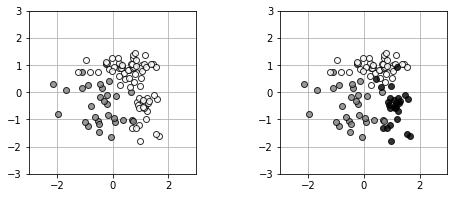

In [9]:
def show_data2(x,t):
    wk ,K = t.shape
    c=[[.5,.5,.5],[1,1,1],[0,0,0]]
    for k in range(K):
        plt.plot(x[t[:,k]==1,0] , x[t[:,k]==1,1],linestyle='none',markeredgecolor='black',marker='o',color=c[k],alpha=0.8 )
        plt.grid(True)
plt.figure(figsize=(7.5,3))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1,2,1)
show_data2(X,T2)
plt.xlim(X_range0)
plt.ylim(X_range1)

plt.subplot(1,2,2)
show_data2(X,T3)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()

### 로지스틱 회귀 모델

In [10]:
#로지스틱 회귀 모델
def logistic2(x0,x1,w):
    y = 1/(1+np.exp(-(w[0]*x0+w[1]*x1+w[2])))
    return y

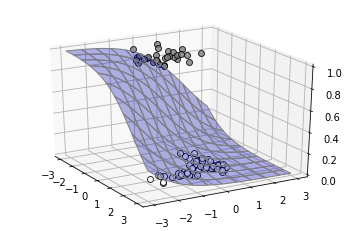

In [15]:
from mpl_toolkits.mplot3d import Axes3D

def show3d_logistic2(ax,w):
    xn = 50#등고선 해상도
    x0 = np.linspace(X_range0[0],X_range0[1],xn)
    x1 = np.linspace(X_range1[0],X_range1[1],xn)
    xx0,xx1 = np.meshgrid(x0,x1)
    y=logistic2(xx0,xx1,w)
    ax.plot_surface(xx0,xx1,y,color='blue',edgecolor='gray',rstride=5,cstride=5,alpha=0.3)

def show_data2_3d(ax,x,t):
    c=[[.5,.5,.5],[1,1,1]]
    for i in range(2):
        ax.plot(x[t[:,i]==1,0] , x[t[:,i]==1,1],1-i,linestyle='none',markeredgecolor='black',marker='o',color=c[i],alpha=0.8 )
    Ax.view_init(elev=25,azim=-30)
    
    
Ax=plt.subplot(1,1,1,projection='3d')
W=[-1,-1,-1]
show3d_logistic2(Ax,W)
show_data2_3d(Ax,X,T2)

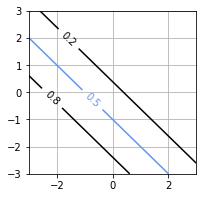

In [17]:
def show_contour_logistic2(w):
    xn = 30#등고선 해상도
    x0 = np.linspace(X_range0[0],X_range0[1],xn)
    x1 = np.linspace(X_range1[0],X_range1[1],xn)
    xx0,xx1 = np.meshgrid(x0,x1)
    y=logistic2(xx0,xx1,w)
    cont = plt.contour(xx0,xx1,y,levels=(0.2,0.5,0.8),colors=['k','cornflowerblue','k'])
    cont.clabel(fmt='%1.1f',fontsize=10)
    plt.grid(True)

plt.figure(figsize=(3,3))
W=[-1,-1,-1]
show_contour_logistic2(W)

크로스 엔트로피 오차

In [18]:
def cee_logistic2(w,x,t):
    X_n = x.shape[0]
    y=logistic2(x[:,0],x[:,1],w)
    cee=0
    for n in range(len(y)):
        cee = cee-(t[n,0]*np.log(y[n])+(1-t[n,0])*np.log(1-y[n]))
    cee =cee/X_n
    return cee

크로스 엔트로피 오차의 미분

In [21]:
def dcee_logistic2(w,x,t):
    X_n = x.shape[0]
    y=logistic2(x[:,0],x[:,1],w)
    dcee = np.zeros(3)
    for n in range(len(y)):
        dcee[0]=dcee[0]+(y[n]-t[n,0])*x[n,0]
        dcee[1]=dcee[1]+(y[n]-t[n,0])*x[n,1]
        dcee[2]=dcee[2]+(y[n]-t[n,0])
    dcee =dcee/X_n
    return dcee
W=[-1,-1,-1]
dcee_logistic2(W,X,T2)

array([ 0.10272008,  0.04450983, -0.06307245])

In [22]:
from scipy.optimize import minimize
#매개 변수 검색
def fit_logistic2(w_init,x,t):#문제 있음!! 안돼ㅠㅠ
    res1 = minimize(cee_logistic2,w_init,args=(x,t),
                    jac=dcee_logistic2,method="CG")
    print(res1)
    return res1.x

     fun: 0.21749436679545578
     jac: array([-5.50969325e-06, -5.35746559e-06, -5.49374513e-06])
 message: 'Optimization terminated successfully.'
    nfev: 25
     nit: 8
    njev: 25
  status: 0
 success: True
       x: array([-3.7038681 , -2.5350947 , -0.27708727])
w0=-3.70, w1=-2.54, w2=-0.28
CEE = 0.22


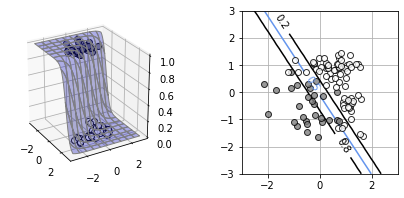

In [27]:
plt.figure(1,figsize=(7,3))
plt.subplots_adjust(wspace=0.5)

Ax = plt.subplot(1,2,1,projection='3d')
W_init=[-1,0,0]
W = fit_logistic2(W_init,X,T2)
print("w0={0:.2f}, w1={1:.2f}, w2={2:.2f}".format(W[0],W[1],W[2]))
show3d_logistic2(Ax,W)
show_data2_3d(Ax,X,T2)
cee=cee_logistic2(W,X,T2)
print("CEE = {0:.2f}".format(cee))
Ax = plt.subplot(1,2,2)
show_data2(X,T2)
show_contour_logistic2(W)
plt.show()

### 2차원 입력 3클래스 분류

소프트맥스 함수를 모델의 출력에 사용하는 것으로, 3클래스 이상의 클래스 분류에 대응 가능  



In [29]:
def logistic3(x0,x1,w):
    K=3
    w =w.reshape((3,3))
    n = len(x1)
    y = np.zeros((n,K))
    for k in range(K):
        y[:,k] = np.exp(w[k,0]*x0+w[k,1]*x1+w[k,2])
    wk = np.sum(y,axis=1)
    wk=y.T/wk
    y = wk.T
    return y

W=np.array([1,2,3,4,5,6,7,8,9])
y = logistic3(X[:3,0],X[:3,1],W)
print(np.round(y,3))

[[0.    0.006 0.994]
 [0.965 0.033 0.001]
 [0.925 0.07  0.005]]


교차 엔트로피 오차

In [30]:
def cee_logistic3(w,x,t):
    X_n = x.shape[0]
    y = logistic3(x[:,0],x[:,1],w)
    cee=0
    N, K = y.shape
    for n in range(N):
        for k in range(K):
            cee = cee-(t[n,k]*np.log(y[n,k]))
    cee = cee/X_n
    return cee

W = np.array([1,2,3,4,5,6,7,8,9])
cee_logistic3(W,X,T3)

3.9824582404787288

경사 하강법에 의한 해

In [31]:
def dcee_logistic3(w,x,t):
    X_n = x.shape[0]
    y = logistic3(x[:,0],x[:,1],w)
    dcee = np.zeros((3,3))
    N,K=y.shape
    for n in range(N):
        for k in range(K):
            dcee[k,:]=dcee[k,:]-(t[n,k]-y[n,k])*np.r_[x[n,:],1]
    dcee = dcee/X_n
    return dcee.reshape(-1)
W=np.array([1,2,3,4,5,6,7,8,9])
dcee_logistic3(W,X,T3)

array([ 0.03778433,  0.03708109, -0.1841851 , -0.21235188, -0.44408101,
       -0.38340835,  0.17456754,  0.40699992,  0.56759346])

In [32]:
def fit_logistic3(w_init,x,t):
    res = minimize(cee_logistic3,w_init,args=(x,t),jac=dcee_logistic3,method="CG")
    return res.x

In [33]:
def show_contour_logistic3(w):
    xn = 30
    x0 = np.linspace(X_range0[0],X_range0[1],xn)
    x1 = np.linspace(X_range1[0],X_range1[1],xn)
    xx0,xx1 = np.meshgrid(x0,x1)
    y = np.zeros((xn,xn,3))
    for i in range(xn):
        wk = logistic3(xx0[:,i],xx1[:,i],w)
        for j in range(3):
            y[:,i,j]=wk[:,j]
    for j in range(3):
        cont = plt.contour(xx0,xx1,y[:,:,j],levels=(0.5,0.9),colors=['cornflowerblue','k'])
        cont.clabel(fmt='%1.1f',fontsize=9)
    plt.grid(True)

[[-3.2  -2.69  2.25]
 [-0.49  4.8  -0.69]
 [ 3.68 -2.11 -1.56]]
CEE = 0.23


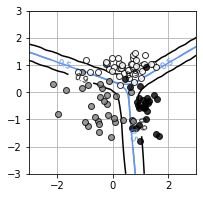

In [34]:
W_init = np.zeros((3,3))
W=fit_logistic3(W_init,X,T3)
print(np.round(W.reshape((3,3)),2))
cee = cee_logistic3(W,X,T3)
print("CEE = {0:.2f}".format(cee))
plt.figure(figsize=(3,3))
show_data2(X,T3)
show_contour_logistic3(W)
plt.show()